In [61]:
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [62]:
np.random.seed(5)
X = np.load("../breast_cancer/X.npy")
y = np.load("../breast_cancer/y.npy").reshape(X.shape[0], 1)

### Split data

In [65]:
X_train = X[:int(0.9*X.shape[0]), :]
y_train = y[:int(0.9*y.shape[0])]
X_test = X[int(0.9*X.shape[0]):, :]
y_test = y[int(0.9*y.shape[0]):]


In [66]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def grad(W, X, y):
    return X.T.dot(sigmoid(X.dot(W)) - y)

## Batch gradient descent

<ipython-input-66-376f34ceb083>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


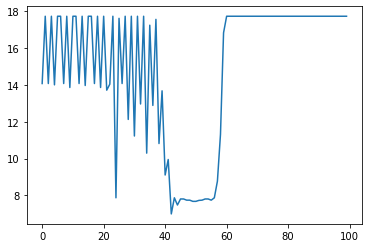

In [77]:
lr = 0.005
epochs = 100
W = np.random.randn(30,1)
loss = []
list_W = []
for i in range(epochs):
    W = W - lr * (grad(W, X_train, y_train))
    y_pred_train = sigmoid(X_train.dot(W))
    list_W.append(W)
    loss.append(np.linalg.norm(y_pred_train - y_train))
    lr = lr - 0.0001
plt.plot(loss)

In [78]:
Min = min(loss)
W_opti = list_W[loss.index(Min)]
y_pred_test = sigmoid(X_test.dot(W_opti))
y_pred_test_class =[]
for i in y_pred_test:
    if(i >= 0.5):
        y_pred_test_class.append(1)
    else:
        y_pred_test_class.append(0)

        

<ipython-input-66-376f34ceb083>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


In [82]:
count = 0
for i in range(len(y_test)):
    if (y_test[i] == y_pred_test_class[i]):
        count += 1
accuracy = count / len(y_test)
print (accuracy)
    

0.8947368421052632


## Stochastic gradient descent

<ipython-input-66-376f34ceb083>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


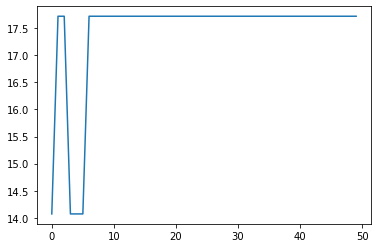

In [106]:
lr = 0.001
epochs = 50
W = np.random.randn(30,1)
loss = []
list_W = []
N = X_train.shape[0]
for epoch in range(epochs):
    mix_id = np.random.permutation(N)
    for i in mix_id:
        xi = X_train[i, :].reshape(1,30)
        yi = y_train[i].reshape(1,1)
        W = W - lr * (grad(W, xi, yi))
        y_pred_train = sigmoid(xi.dot(W))
        list_W.append(W)
    loss.append(np.linalg.norm(y_pred_train - y_train))
    lr = lr - 0.0002
plt.plot(loss)

In [107]:
Min = min(loss)
W_opti = list_W[loss.index(Min)]
y_pred_test = sigmoid(X_test.dot(W_opti))
y_pred_test_class =[]
for i in y_pred_test:
    if(i >= 0.5):
        y_pred_test_class.append(1)
    else:
        y_pred_test_class.append(0)

<ipython-input-66-376f34ceb083>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


In [108]:
count = 0
for i in range(len(y_test)):
    if (y_test[i] == y_pred_test_class[i]):
        count += 1
accuracy = count / len(y_test)
print (accuracy)

0.24561403508771928


## Sklearn

In [109]:
from sklearn.linear_model import LogisticRegression

In [111]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
y_pred = clf.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
accuracy_score(y_test, y_pred)

0.9824561403508771